# Image manipulation

- Accessing and manipulationg image pixels.
- image resizing.
- cropping
- flipping

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

## Download data

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

## Accessing and modifying pixels

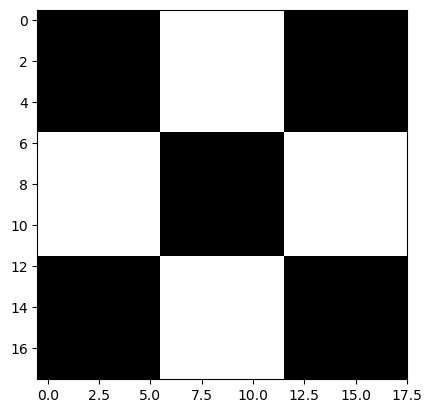

In [4]:
check_img = cv.imread('checkerboard_18x18.png', 0)

plt.imshow(check_img, cmap='gray');

In [5]:
print(check_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [6]:
check_img[0,6]

np.uint8(255)

In [7]:
check_img[0,0]

np.uint8(0)

In [8]:
# modifying
check_img_copy = check_img.copy()

In [9]:
check_img_copy[2,2]=200
check_img_copy[2,3]=200
check_img_copy[3,2]=200
check_img_copy[3,3]=200

print(check_img_copy)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

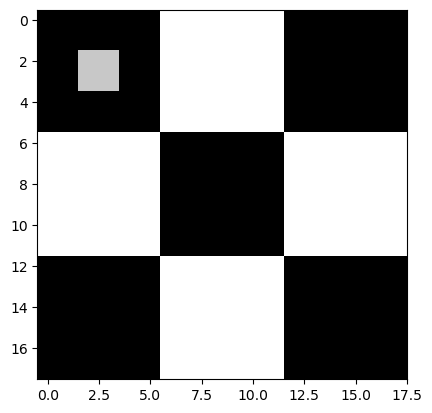

In [11]:
plt.imshow(check_img_copy, cmap='gray');

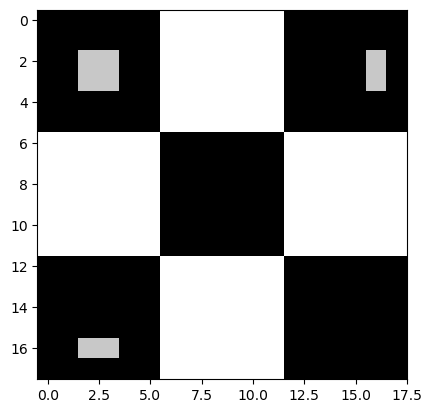

In [15]:
check_img_copy[16,2] = 200
check_img_copy[16,3] = 200
check_img_copy[2,16] = 200
check_img_copy[3,16] = 200
plt.imshow(check_img_copy,cmap='gray');

## Cropping Images

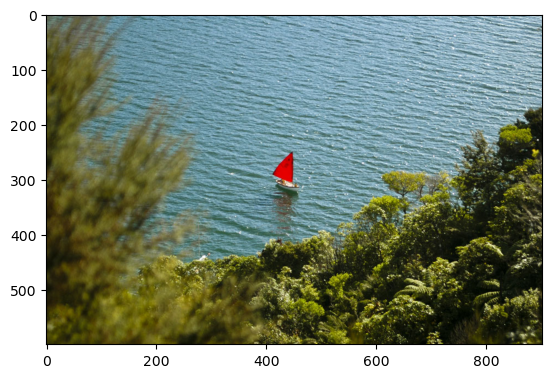

In [16]:
boat_img = cv.imread('New_Zealand_Boat.jpg',1)
boat = boat_img[:, :, ::-1]
plt.imshow(boat);

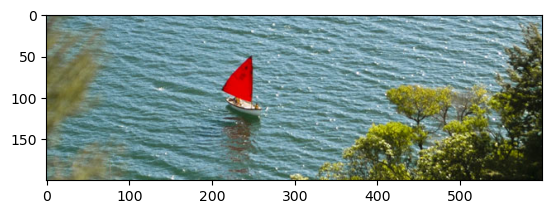

In [17]:
boat_cropped = boat[200:400, 200:800]
plt.imshow(boat_cropped);

## Resizing Images

- resize the images using the `cv.resize()`

- which takes input image, desired size, fx, fy for scaling factor. and interpolation.


### Method1: using the fx,fy

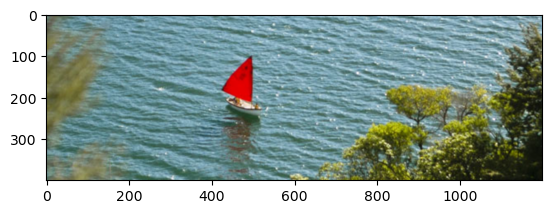

In [18]:
resized_img = cv.resize(boat_cropped, None, fx=2, fy=2)
plt.imshow(resized_img);

the above image is doubled the size using the resize method. see the scalinf of x,y axes in above images and this image.

we used the fx, fy=2 for dobuling image size.

### method 2: resize to exact size

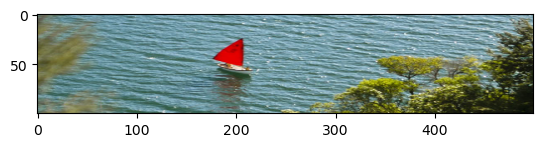

In [20]:
w = 500
h = 100

dim = (w,h)

resized_img1 = cv.resize(boat_cropped, dsize=dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_img1);

the output of the image is resized down to half of cropped boat image, using the `interpolation=cv.INTER_AREA`

### method 3: resizing while maintaining aspect ratio.

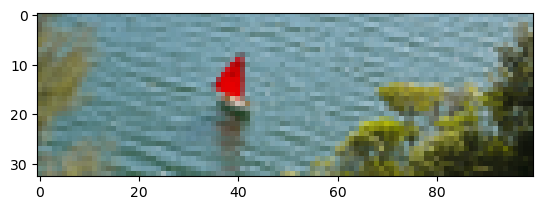

In [22]:
w1 = 100
aspect_ratio = w1/boat_cropped.shape[1]
h1 = int(boat_cropped.shape[0]*aspect_ratio)

dim1 = (w1,h1)

resized_img2 = cv.resize(boat_cropped, dsize=dim1, interpolation=cv.INTER_AREA)
plt.imshow(resized_img2);

resize image w.r.t the orginal aspect ratio.

## Flipping images

- use the `cv.flip(src, flipCode)`
- flipCode=0 flip around x-axis, flipCode=+ve value(1) flip around y-axis, flipCode=-ve(-1), flip around both axes.

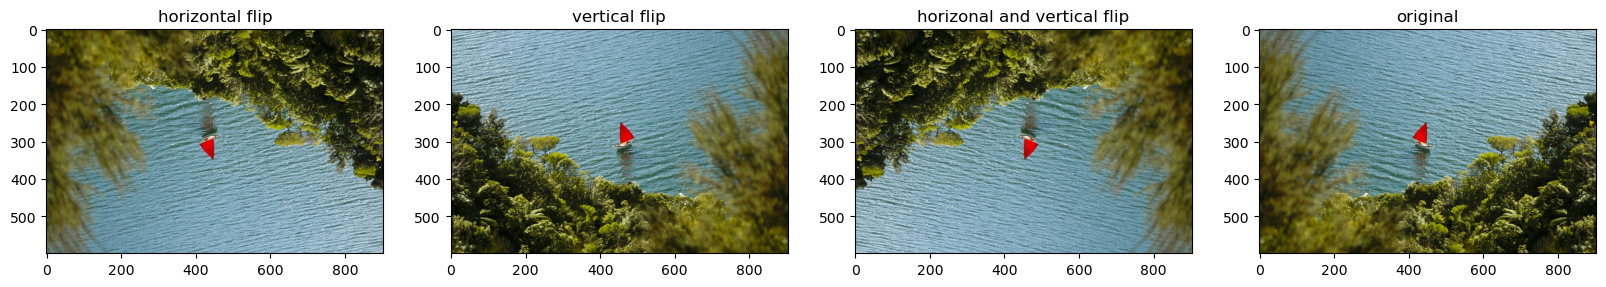

In [23]:
xflip = cv.flip(boat,0)
yflip = cv.flip(boat,1)
xyflip = cv.flip(boat,-1)

fig, ax = plt.subplots(1,4,figsize=[20,5])

ax[0].imshow(xflip)
ax[0].set_title('horizontal flip')
ax[1].imshow(yflip)
ax[1].set_title('vertical flip')
ax[2].imshow(xyflip)
ax[2].set_title('horizonal and vertical flip')
ax[3].imshow(boat)
ax[3].set_title('original')

plt.show()

## quiz practice

In [ ]:
cv.flip?